In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

### Data Extraction

In [2]:
adult=pd.read_csv(r"W:\INTERNSHIP\adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32553 entries, 0 to 32552
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32553 non-null  int64 
 1   workclass       32553 non-null  object
 2   fnlwgt          32553 non-null  int64 
 3   education       32553 non-null  object
 4   education.num   32553 non-null  int64 
 5   marital.status  32553 non-null  object
 6   occupation      32553 non-null  object
 7   relationship    32553 non-null  object
 8   race            32553 non-null  object
 9   sex             32553 non-null  object
 10  capital.gain    32553 non-null  int64 
 11  capital.loss    32553 non-null  int64 
 12  hours.per.week  32553 non-null  int64 
 13  native.country  32553 non-null  object
 14  income          32553 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
dropc=['fnlwgt','education.num','marital.status','race']
for col in dropc:
    del adult[col]

In [6]:
adult.head(30)

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,Other-service,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,Doctorate,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,HS-grad,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,Some-college,Craft-repair,Unmarried,Male,0,3004,60,United-States,>50K


In [7]:
for col in adult.columns:
    adult[col]=adult[col].replace(' ?',np.nan)
        

In [8]:
adult.head()

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,Other-service,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [9]:
adult.isnull().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
for col in adult.columns:
    if adult[col].dtype=='object':
        print(col)
        print(adult[col].unique())

workclass
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc' '?'
 'Local-gov' 'Without-pay' 'Never-worked']
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
occupation
['Exec-managerial' 'Other-service' 'Machine-op-inspct' 'Prof-specialty'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' '?' 'Farming-fishing' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
sex
['Female' 'Male']
native.country
['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' '?' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-S

In [11]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None, verbose=0,
                           copy=True,add_indicator=False)
adult['workclass']=si.fit_transform(adult[['workclass']])
adult['native.country']=si.fit_transform(adult[['native.country']])

In [12]:
adult.head(30)

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,Other-service,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,Doctorate,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,HS-grad,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,Some-college,Craft-repair,Unmarried,Male,0,3004,60,United-States,>50K


In [13]:
adult.isnull().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
adultBK=adult.copy()

In [15]:
for col in adult.columns:
    if adult[col].dtype=='object':
        print(col)
        print(adult[col].unique())

workclass
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc' '?'
 'Local-gov' 'Without-pay' 'Never-worked']
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
occupation
['Exec-managerial' 'Other-service' 'Machine-op-inspct' 'Prof-specialty'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' '?' 'Farming-fishing' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
sex
['Female' 'Male']
native.country
['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' '?' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-S

In [16]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
adult['workclass']=LE.fit_transform(adult['workclass'])
adult['education']=LE.fit_transform(adult['education'])
adult['occupation']=LE.fit_transform(adult['occupation'])
adult['relationship']=LE.fit_transform(adult['relationship'])
adult['sex']=LE.fit_transform(adult['sex'])
adult['native.country']=LE.fit_transform(adult['native.country'])
adult['income']=LE.fit_transform(adult['income'])

In [17]:
adult.head(10)

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,4,11,4,1,0,0,4356,40,39,0
1,82,4,11,4,1,0,0,4356,18,39,0
2,66,4,15,8,4,0,0,4356,40,39,0
3,54,4,5,7,4,0,0,3900,40,39,0
4,41,4,15,10,3,0,0,3900,40,39,0
5,34,4,11,8,4,0,0,3770,45,39,0
6,38,4,0,1,4,1,0,3770,40,39,0
7,74,7,10,10,2,0,0,3683,20,39,1
8,68,1,11,10,1,0,0,3683,40,39,0
9,41,4,15,3,4,1,0,3004,60,39,1


In [18]:
IndepVar = []
for col in adult.columns:
    if col != 'income':
        IndepVar.append(col)

TargetVar = 'income'

x = adult[IndepVar]
y = adult[TargetVar]

In [19]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22787, 10), (9766, 10), (22787,), (9766,))

In [20]:
cols1=['age','workclass','education','occupation','hours.per.week']

In [21]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [22]:
# Load the Results dataset

Results = pd.read_csv(r"W:\INTERNSHIP\HTResults.csv", header=0)

Results.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 683 1674]
 [ 287 7122]]
Outcome values : 
 683 1674 287 7122
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.29      0.41      2357
           0       0.81      0.96      0.88      7409

    accuracy                           0.80      9766
   macro avg       0.76      0.63      0.64      9766
weighted avg       0.78      0.80      0.77      9766

Accuracy : 79.9 %
Precision : 70.4 %
Recall : 29.0 %
F1 Score : 0.411
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 62.6 %
roc_auc_score: 0.626


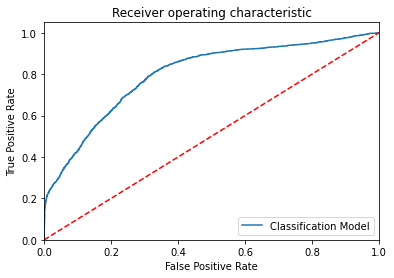

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1433  924]
 [ 852 6557]]
Outcome values : 
 1433 924 852 6557
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.61      0.62      2357
           0       0.88      0.89      0.88      7409

    accuracy                           0.82      9766
   macro avg       0.75      0.75      0.75      9766
weighted avg       0.82      0.82      0.82      9766

Accuracy : 81.8 %
Precision : 62.7 %
Recall : 60.8 %
F1 Score : 0.617
Specificity or True Negative Rate : 88.5 %
Balanced Accuracy : 74.6 %
roc_auc_score: 0.746


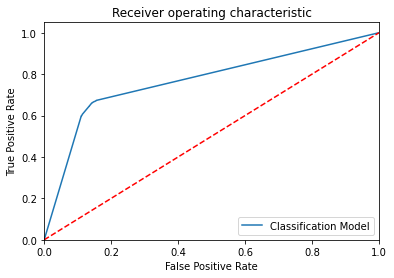

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1442  915]
 [ 584 6825]]
Outcome values : 
 1442 915 584 6825
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.61      0.66      2357
           0       0.88      0.92      0.90      7409

    accuracy                           0.85      9766
   macro avg       0.80      0.77      0.78      9766
weighted avg       0.84      0.85      0.84      9766

Accuracy : 84.7 %
Precision : 71.2 %
Recall : 61.2 %
F1 Score : 0.658
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 76.6 %
roc_auc_score: 0.766


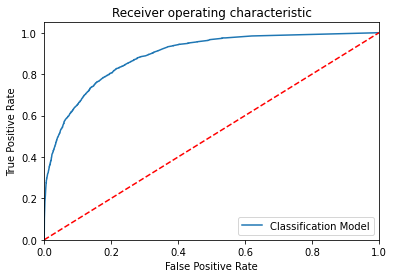

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1433  924]
 [ 605 6804]]
Outcome values : 
 1433 924 605 6804
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.61      0.65      2357
           0       0.88      0.92      0.90      7409

    accuracy                           0.84      9766
   macro avg       0.79      0.76      0.78      9766
weighted avg       0.84      0.84      0.84      9766

Accuracy : 84.3 %
Precision : 70.3 %
Recall : 60.8 %
F1 Score : 0.652
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 76.3 %
roc_auc_score: 0.763


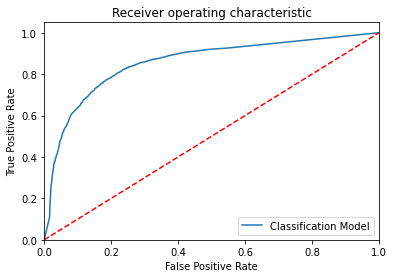

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1489  868]
 [ 645 6764]]
Outcome values : 
 1489 868 645 6764
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.63      0.66      2357
           0       0.89      0.91      0.90      7409

    accuracy                           0.85      9766
   macro avg       0.79      0.77      0.78      9766
weighted avg       0.84      0.85      0.84      9766

Accuracy : 84.5 %
Precision : 69.8 %
Recall : 63.2 %
F1 Score : 0.663
Specificity or True Negative Rate : 91.3 %
Balanced Accuracy : 77.2 %
roc_auc_score: 0.772


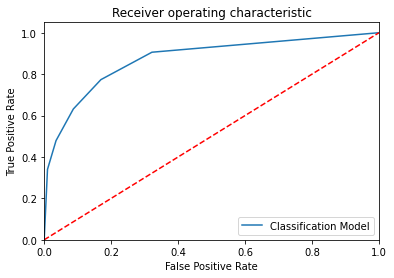

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 639 1718]
 [ 227 7182]]
Outcome values : 
 639 1718 227 7182
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.27      0.40      2357
           0       0.81      0.97      0.88      7409

    accuracy                           0.80      9766
   macro avg       0.77      0.62      0.64      9766
weighted avg       0.79      0.80      0.76      9766

Accuracy : 80.1 %
Precision : 73.8 %
Recall : 27.1 %
F1 Score : 0.397
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 62.0 %
roc_auc_score: 0.62


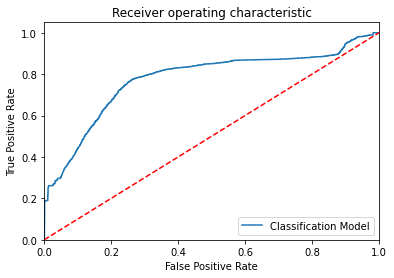

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[1427  930]
 [ 654 6755]]
Outcome values : 
 1427 930 654 6755
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.61      0.64      2357
           0       0.88      0.91      0.90      7409

    accuracy                           0.84      9766
   macro avg       0.78      0.76      0.77      9766
weighted avg       0.83      0.84      0.83      9766

Accuracy : 83.8 %
Precision : 68.6 %
Recall : 60.5 %
F1 Score : 0.643
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 75.8 %
roc_auc_score: 0.759


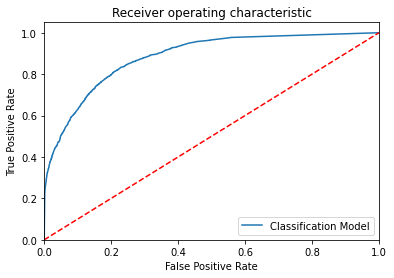

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[1416  941]
 [ 411 6998]]
Outcome values : 
 1416 941 411 6998
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.60      0.68      2357
           0       0.88      0.94      0.91      7409

    accuracy                           0.86      9766
   macro avg       0.83      0.77      0.79      9766
weighted avg       0.86      0.86      0.86      9766

Accuracy : 86.2 %
Precision : 77.5 %
Recall : 60.1 %
F1 Score : 0.677
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 77.3 %
roc_auc_score: 0.773


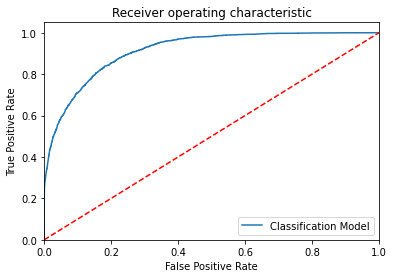

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1530  827]
 [ 436 6973]]
Outcome values : 
 1530 827 436 6973
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.65      0.71      2357
           0       0.89      0.94      0.92      7409

    accuracy                           0.87      9766
   macro avg       0.84      0.80      0.81      9766
weighted avg       0.87      0.87      0.87      9766

Accuracy : 87.1 %
Precision : 77.8 %
Recall : 64.9 %
F1 Score : 0.708
Specificity or True Negative Rate : 94.1 %
Balanced Accuracy : 79.5 %
roc_auc_score: 0.795


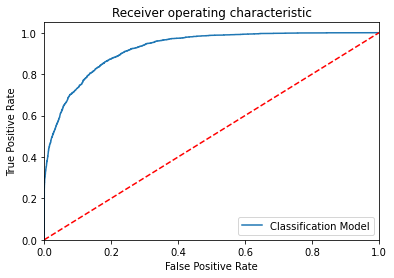

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 722 1635]
 [ 394 7015]]
Outcome values : 
 722 1635 394 7015
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.31      0.42      2357
           0       0.81      0.95      0.87      7409

    accuracy                           0.79      9766
   macro avg       0.73      0.63      0.64      9766
weighted avg       0.77      0.79      0.76      9766

Accuracy : 79.2 %
Precision : 64.7 %
Recall : 30.6 %
F1 Score : 0.416
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 62.6 %
roc_auc_score: 0.627


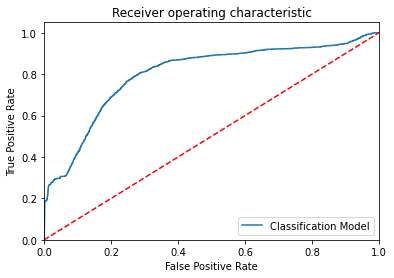

-----------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
Results

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),683,1674,287,7122,0.799,0.704,0.290,0.411,0.961,0.359,0.625519,0.626
1,DecisionTreeClassifier(),1433,924,852,6557,0.818,0.627,0.608,0.617,0.885,0.498,0.746490,0.746
2,"(DecisionTreeClassifier(max_features='auto', r...",1442,915,584,6825,0.847,0.712,0.612,0.658,0.921,0.562,0.766486,0.766
3,"(ExtraTreeClassifier(random_state=1246788334),...",1433,924,605,6804,0.843,0.703,0.608,0.652,0.918,0.554,0.763159,0.763
4,KNeighborsClassifier(),1489,868,645,6764,0.845,0.698,0.632,0.663,0.913,0.564,0.772339,0.772
5,SVC(probability=True),639,1718,227,7182,0.801,0.738,0.271,0.397,0.969,0.362,0.620234,0.620
6,(DecisionTreeClassifier(random_state=119997463...,1427,930,654,6755,0.838,0.686,0.605,0.643,0.912,0.540,0.758580,0.758
7,([DecisionTreeRegressor(criterion='friedman_ms...,1416,941,411,6998,0.862,0.775,0.601,0.677,0.945,0.598,0.772645,0.773
8,LGBMClassifier(),1530,827,436,6973,0.871,0.778,0.649,0.708,0.941,0.630,0.795141,0.795
9,GaussianNB(),722,1635,394,7015,0.792,0.647,0.306,0.416,0.947,0.340,0.626572,0.626


In [25]:

# Train the model with train data 

ModelLGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLGB.predict(x_test)
y_pred_prob = ModelLGB.predict_proba(x_test)



# actual values

actual = y_test

# predicted values

predicted = y_pred

In [26]:
# Results

PredResults = pd.DataFrame({'Income_Actual':y_test, 'Income_Predicted':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = adultBK.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(10)

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Income_Actual,Income_Predicted
6757,47,Private,11th,Machine-op-inspct,Wife,Female,0,0,40,United-States,<=50K,0,0
13814,43,Private,Assoc-voc,Craft-repair,Husband,Male,0,0,40,United-States,<=50K,0,0
2361,46,Local-gov,Masters,Prof-specialty,Not-in-family,Female,8614,0,55,United-States,>50K,1,1
10993,24,?,Bachelors,?,Not-in-family,Female,0,0,40,United-States,<=50K,0,0
32365,53,Private,Assoc-voc,Craft-repair,Husband,Male,0,0,40,United-States,<=50K,0,0
895,39,Local-gov,HS-grad,Craft-repair,Not-in-family,Male,0,1876,40,United-States,<=50K,0,0
25343,26,Self-emp-not-inc,Some-college,Farming-fishing,Husband,Male,0,0,78,United-States,<=50K,0,0
10152,68,Private,11th,Transport-moving,Not-in-family,Male,0,0,70,United-States,<=50K,0,0
25355,58,Local-gov,9th,Other-service,Not-in-family,Female,0,0,40,United-States,<=50K,0,0
2117,37,Private,Prof-school,Prof-specialty,Husband,Male,15024,0,45,United-States,>50K,1,1


In [27]:
TestDataResults.sample(30)

,age,workclass,education,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Income_Actual,Income_Predicted
27254,59,Private,12th,Transport-moving,Other-relative,Male,0,0,35,United-States,<=50K,0,0
18849,30,Local-gov,Bachelors,Protective-serv,Husband,Male,0,0,45,United-States,>50K,1,1
11275,23,Private,Some-college,Other-service,Not-in-family,Female,0,0,28,United-States,<=50K,0,0
22597,18,Private,10th,Priv-house-serv,Own-child,Female,0,0,20,United-States,<=50K,0,0
31874,41,Private,Some-college,Tech-support,Unmarried,Female,0,0,40,Philippines,<=50K,0,0
16332,20,Private,Some-college,Adm-clerical,Own-child,Female,0,0,35,United-States,<=50K,0,0
16095,30,Local-gov,HS-grad,Other-service,Unmarried,Female,0,0,26,United-States,<=50K,0,0
8283,31,Private,Some-college,Craft-repair,Husband,Male,0,0,40,United-States,<=50K,0,0
16362,41,Self-emp-not-inc,Assoc-voc,Prof-specialty,Wife,Female,0,0,15,United-States,>50K,1,0
7477,28,Private,Bachelors,Other-service,Husband,Male,0,0,50,United-States,<=50K,0,0
